In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [15]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


### Media

In [16]:
df['Life_Expectancy'].mean()

77.90948905109488

### Mediana

In [17]:
df['Life_Expectancy'].median()

78.1

### Desviación estandar

In [18]:
df['Life_Expectancy'].std()

3.276263466523638

### Rango valor máximo y mínimo

In [19]:
rango = df['Life_Expectancy'].max() - df['Life_Expectancy'].min()
rango

14.100000000000009

### Cuartiles

In [21]:
median = df['Life_Expectancy'].median()
q1 = df['Life_Expectancy'].quantile(0.25)
q3 = df['Life_Expectancy'].quantile(0.75)
min_val = df['Life_Expectancy'].quantile(q=0)
max_val = df['Life_Expectancy'].quantile(q=1)
iqr = q3 - q1
iqr

5.049999999999983

## Límites para la detección de Outliers

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [22]:
minlimit= q1 -1.5*iqr
maxlimit= q3 +1.5*iqr
print('Rango para la detección de outliters: {}, {}'.format(minlimit, maxlimit))

Rango para la detección de outliters: 67.95000000000003, 88.14999999999996


<Axes: xlabel='Life_Expectancy', ylabel='Count'>

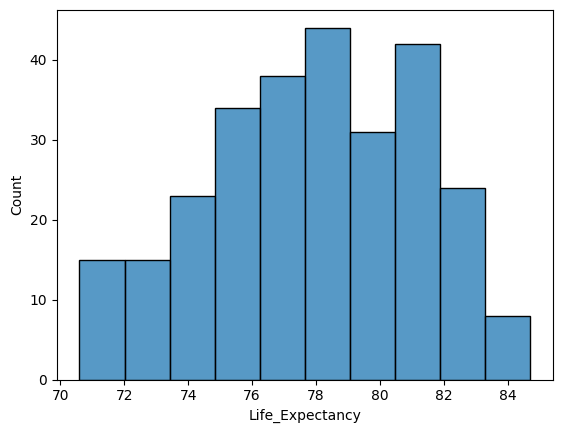

In [23]:
sns.histplot(df['Life_Expectancy'])

<Axes: ylabel='Life_Expectancy'>

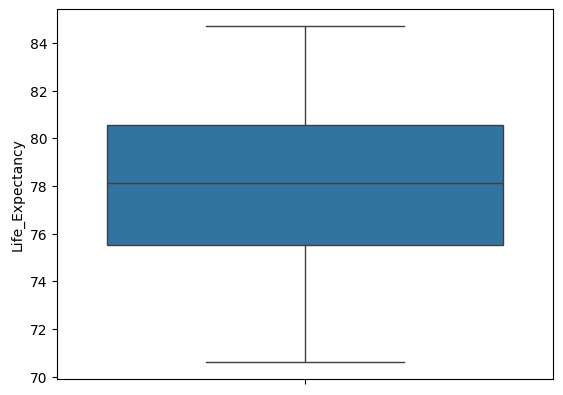

In [24]:
sns.boxplot(df['Life_Expectancy'])

<Axes: xlabel='Life_Expectancy', ylabel='Spending_USD'>

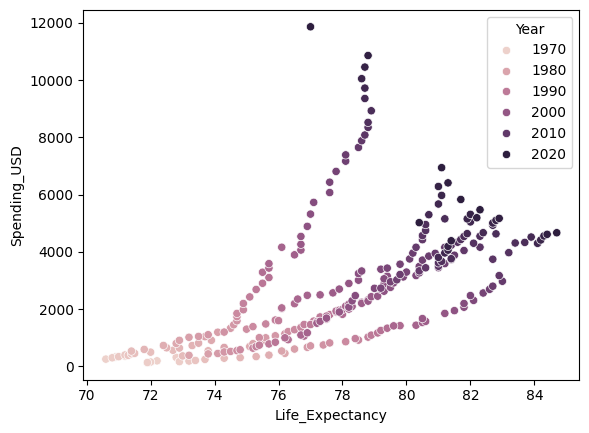

In [28]:
sns.scatterplot(data=df, x='Life_Expectancy', y='Spending_USD', hue='Year')

<ipython-input-31-e0b51e2ea3ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Spending_USD', palette='inferno')


<Axes: xlabel='Country', ylabel='Spending_USD'>

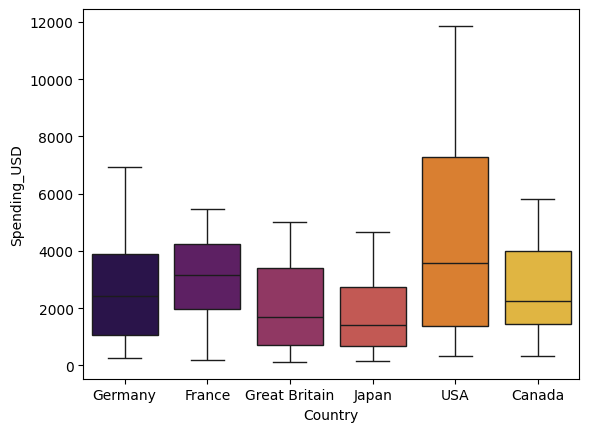

In [31]:
sns.boxplot(data=df, x='Country', y='Spending_USD', palette='inferno')

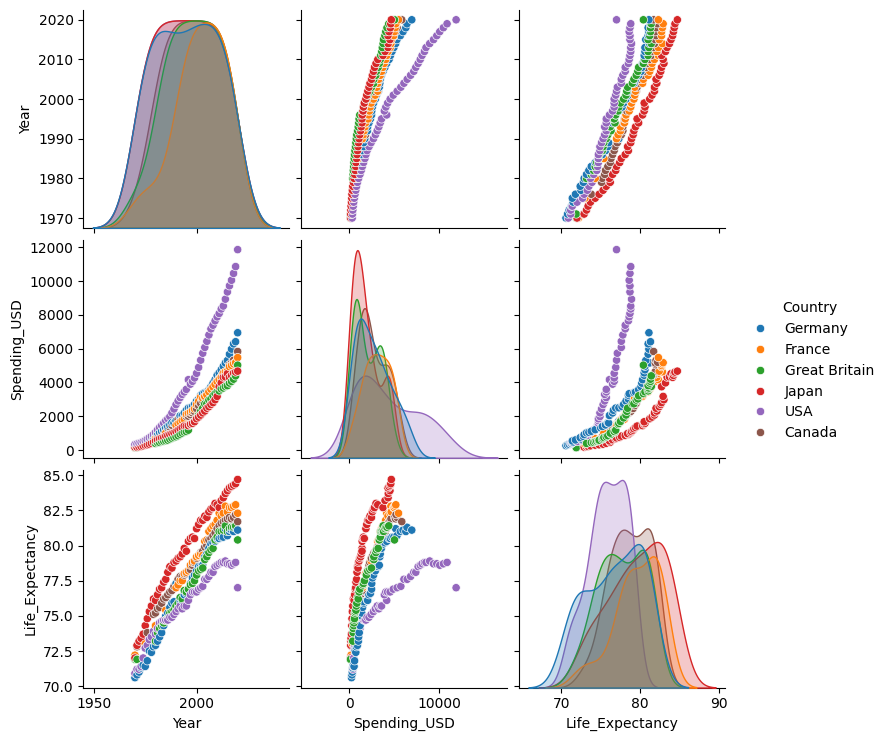

In [32]:
sns.pairplot(df, hue='Country')

In [33]:
df.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

In [40]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Life_Expectancy','Spending_USD']].values)
scaled.T

array([[-2.23512676e+00, -1.74587193e+00, -1.83760721e+00,
        -1.80702879e+00, -2.14339148e+00, -1.56240137e+00,
        -2.17396991e+00, -1.83760721e+00, -1.53182295e+00,
        -2.05165620e+00, -2.11281306e+00, -1.44008766e+00,
        -2.05165620e+00, -2.02107777e+00, -1.37893081e+00,
        -1.99049935e+00, -1.95992092e+00, -1.28719553e+00,
        -1.80702879e+00, -1.99049935e+00, -1.50124452e+00,
        -1.10372497e+00, -1.59297980e+00, -1.25661710e+00,
        -1.86818564e+00, -9.50832835e-01, -1.53182295e+00,
        -1.65413665e+00, -7.97940701e-01, -1.40950924e+00,
        -1.68471508e+00, -6.75626993e-01, -1.34835238e+00,
        -8.59097554e-01, -1.56240137e+00, -5.22734859e-01,
        -1.22603868e+00, -8.28519128e-01, -1.53182295e+00,
        -1.10372497e+00, -1.44008766e+00, -5.53313286e-01,
        -1.28719553e+00, -7.36783847e-01, -1.44008766e+00,
        -1.25661710e+00, -4.30999579e-01, -1.16488182e+00,
        -7.06205420e-01, -1.34835238e+00, -1.16488182e+0

### Matriz de covarianzas

In [41]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[1.003663  , 0.58155291],
       [0.58155291, 1.003663  ]])

<function matplotlib.pyplot.show(close=None, block=None)>

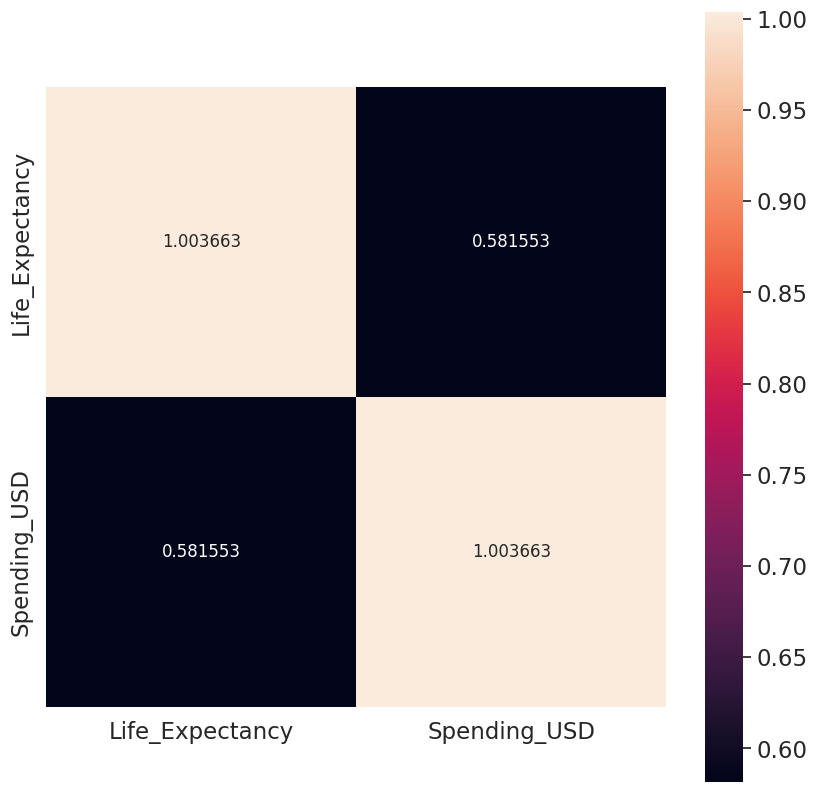

In [42]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.heatmap(covariance_matrix, cbar=True, annot=True, square=True, fmt='2f', annot_kws={'size':12},
            yticklabels=['Life_Expectancy','Spending_USD'],
            xticklabels=['Life_Expectancy','Spending_USD'])
plt.show

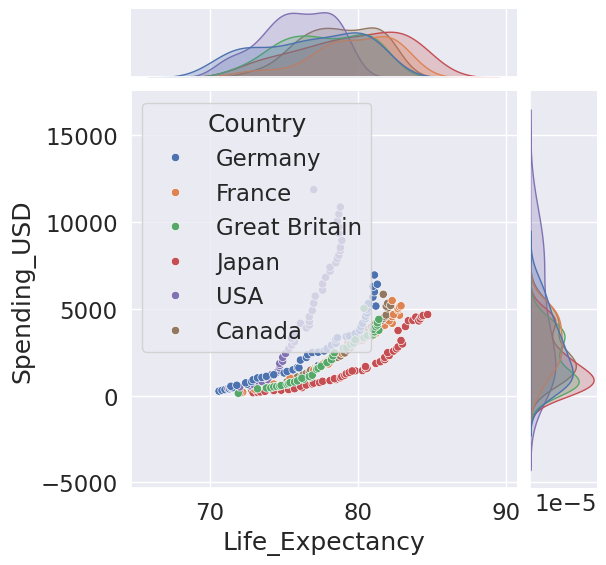

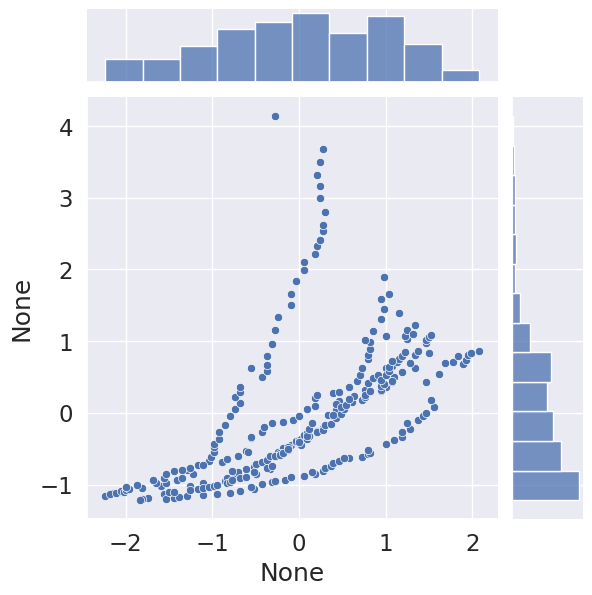

In [48]:
sns.jointplot(data=df, x='Life_Expectancy', y='Spending_USD', hue='Country')
sns.jointplot(x= scaled[:,0], y=scaled[:,1])

In [49]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

array([0.42211009, 1.58521592])

In [50]:
eigen_values

array([0.42211009, 1.58521592])

In [51]:
eigen_vectors

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [53]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[21.028477057345228, 78.97152294265477]


In [54]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [60]:
pca.explained_variance_ratio_

array([0.78971523, 0.21028477])

In [61]:
reduced_scaled = pca.transform(scaled)
reduced_scaled

array([[-2.39928038e+00,  7.61666202e-01],
       [-2.07274375e+00,  3.96292015e-01],
       [-2.15960530e+00,  4.39163743e-01],
       [-2.12944848e+00,  4.26076137e-01],
       [-2.31032100e+00,  7.20892302e-01],
       [-1.90387857e+00,  3.05690637e-01],
       [-2.34120916e+00,  7.33248573e-01],
       [-2.15632010e+00,  4.42448941e-01],
       [-1.93051833e+00,  2.35806458e-01],
       [-2.23544063e+00,  6.66039399e-01],
       [-2.28534130e+00,  7.02627580e-01],
       [-1.85870110e+00,  1.77890404e-01],
       [-2.22281849e+00,  6.78661541e-01],
       [-2.20524863e+00,  6.52986971e-01],
       [-1.80887660e+00,  1.41226055e-01],
       [-2.16595271e+00,  6.49038468e-01],
       [-2.13999219e+00,  6.31754562e-01],
       [-1.73231377e+00,  8.80556099e-02],
       [-2.01820652e+00,  5.37318102e-01],
       [-2.13587987e+00,  6.79111305e-01],
       [-1.84442633e+00,  2.78654024e-01],
       [-1.58894429e+00, -2.80414687e-02],
       [-1.84566749e+00,  4.07146147e-01],
       [-1.

In [64]:
df['pca_1'] = reduced_scaled[:,0]
df['pca_2'] = reduced_scaled[:,1]
df.head()

,Year,Country,Spending_USD,Life_Expectancy,pca_1,pca_2
0,1970,Germany,252.311,70.6,-2.399280,0.761666
1,1970,France,192.143,72.2,-2.072744,0.396292
2,1970,Great Britain,123.993,71.9,-2.159605,0.439164
3,1970,Japan,150.437,72.0,-2.129448,0.426076
4,1970,USA,326.961,70.9,-2.310321,0.720892


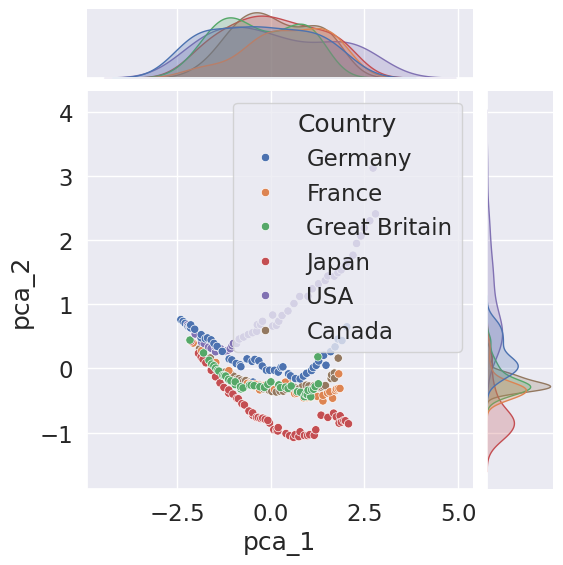

In [65]:
sns.jointplot(data=df, x='pca_1', y='pca_2', hue='Country')